In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter  # For Savitzky-Golay smoothing
plt.style.use('seaborn-whitegrid')

df = pd.read_csv(
    "EVSE-B-PowerCombined.csv",
    low_memory=False
)
df1 = pd.read_csv(
    "EVSE-B-HPC-Kernel-Events-Combined.csv",
    low_memory=False
)
df2 = pd.read_csv(
    "backdoors..csv",
    low_memory=False
)


In [ ]:
 # EDA, data understanding and preparation

In [5]:
print(df.dtypes)
print(df.shape)

time              object
shunt_voltage      int64
bus_voltage_V    float64
current_mA         int64
power_mW           int64
State             object
Attack            object
Attack-Group      object
Label             object
interface         object
dtype: object
(115298, 10)


In [6]:
print(df1.dtypes)
print(df1.shape)

time                             float64
alarmtimer_alarmtimer_cancel       int64
alarmtimer_alarmtimer_fired        int64
alarmtimer_alarmtimer_start        int64
alarmtimer_alarmtimer_suspend      int64
                                  ...   
State                             object
Attack                            object
Scenario                          object
Label                             object
interface                         object
Length: 911, dtype: object
(6166, 911)


In [25]:
df

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface
0,12/25/2023 22:35,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp
1,12/25/2023 22:35,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp
2,12/25/2023 22:35,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp
3,12/25/2023 22:35,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp
4,12/25/2023 22:35,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp
...,...,...,...,...,...,...,...,...,...,...
115293,12/30/2023 11:51,484,5.201,487,2500,idle,Backdoor,host-attack,attack,any
115294,12/30/2023 11:51,477,5.197,567,2860,idle,Backdoor,host-attack,attack,any
115295,12/30/2023 11:51,510,5.197,509,2660,idle,Backdoor,host-attack,attack,any
115296,12/30/2023 11:51,477,5.201,477,2500,idle,Backdoor,host-attack,attack,any


In [4]:
df.columns

Index(['time', 'shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW',
       'State', 'Attack', 'Attack-Group', 'Label', 'interface'],
      dtype='object')

In [6]:
df.describe()

,shunt_voltage,bus_voltage_V,current_mA,power_mW
count,115298.000000,115298.000000,115298.000000,115298.000000
mean,619.787932,5.188204,619.760672,3212.783916
std,197.188339,0.014482,197.312950,1011.567259
min,417.000000,5.149000,417.000000,2160.000000
25%,467.000000,5.181000,467.000000,2420.000000
50%,510.000000,5.197000,510.000000,2660.000000
75%,746.000000,5.197000,747.000000,3860.000000
max,1214.000000,5.209000,1220.000000,6300.000000


In [7]:
df.dtypes

time              object
shunt_voltage      int64
bus_voltage_V    float64
current_mA         int64
power_mW           int64
State             object
Attack            object
Attack-Group      object
Label             object
interface         object
dtype: object

In [3]:
df1

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written,State,Attack,Scenario,Label,interface
0,5.001477,0,0,0,0,0,693371795,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,0,0,0,0,0,699964025,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,0,0,0,0,0,549770341,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,0,0,0,0,0,571970875,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,0,0,0,0,0,553199786,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,0,0,0,0,0,5463807,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6162,288.714173,0,0,0,0,0,10977108,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6163,293.790086,0,0,0,0,0,3683292,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6164,298.861925,0,0,0,0,0,5165840,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp


In [6]:
df1.describe()

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_sb_inodes_requeue,writeback_writeback_single_inode,writeback_writeback_single_inode_start,writeback_writeback_start,writeback_writeback_wait,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written
count,6166.000000,6166.0,6166.0,6166.0,6166.0,6166.0,6.166000e+03,6166.000000,6166.0,6166.0,...,6166.0,6166.0,6166.0,6166.0,6166.0,6166.0,6166.0,6166.0,6166.0,6166.0
mean,1860.346013,0.0,0.0,0.0,0.0,0.0,1.911801e+08,6.999513,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1813.883544,0.0,0.0,0.0,0.0,0.0,2.954542e+08,149.189791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,212.848095,0.0,0.0,0.0,0.0,0.0,1.724897e+06,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1285.785559,0.0,0.0,0.0,0.0,0.0,5.755380e+06,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3239.592572,0.0,0.0,0.0,0.0,0.0,5.414566e+08,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5855.669471,0.0,0.0,0.0,0.0,0.0,9.738758e+08,5343.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# df.isna().sum() # no nulls in power dataset
df1.drop((df1 == 0).all()[(df1 == 0).all()].index.tolist(), axis=1).describe()

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,tcp_tcp_send_reset,ttbr_write_retired,unaligned_ld_spec,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty
count,6166.000000,6.166000e+03,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,...,6166.000000,6.166000e+03,6.166000e+03,6.166000e+03,6.166000e+03,6.166000e+03,6166.000000,6166.000000,6166.000000,6166.000000
mean,1860.346013,1.911801e+08,6.999513,16.462050,15.734350,1.661855,8.244080,4.346902,8.212780,8.214888,...,1175.252027,4.602576e+05,6.733828e+06,7.091462e+06,3.575249e+05,4.112948e+05,3.058547,3.058547,1.387772,4.856147
std,1813.883544,2.954542e+08,149.189791,285.895499,273.077542,55.774316,143.623573,91.116824,142.929996,143.053854,...,9463.686994,3.242693e+05,8.198583e+06,8.167278e+06,4.910568e+05,5.962581e+05,95.805455,95.805455,50.337608,138.947591
min,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,1.158600e+04,1.189300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,212.848095,1.724897e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.483830e+05,1.039808e+06,1.346732e+06,7.904300e+04,3.477475e+04,0.000000,0.000000,0.000000,0.000000
50%,1285.785559,5.755380e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.949615e+05,2.087994e+06,2.568078e+06,2.770580e+05,2.186255e+05,0.000000,0.000000,0.000000,0.000000
75%,3239.592572,5.414566e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.083622e+05,1.732339e+07,1.763779e+07,3.682378e+05,4.629372e+05,0.000000,0.000000,0.000000,0.000000
max,5855.669471,9.738758e+08,5343.000000,8075.000000,7780.000000,2282.000000,4398.000000,3651.000000,4388.000000,4398.000000,...,168828.000000,2.421179e+06,2.678071e+07,2.702705e+07,6.270289e+06,7.154448e+06,5162.000000,5162.000000,2132.000000,5251.000000


In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
115293    False
115294    False
115295    False
115296     True
115297    False
Length: 115298, dtype: bool

In [16]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface
0,12/25/2023 22:35,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp
1,12/25/2023 22:35,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp
2,12/25/2023 22:35,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp
3,12/25/2023 22:35,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp
4,12/25/2023 22:35,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp
...,...,...,...,...,...,...,...,...,...,...
115292,12/30/2023 11:51,699,5.177,764,2680,idle,Backdoor,host-attack,attack,any
115293,12/30/2023 11:51,484,5.201,487,2500,idle,Backdoor,host-attack,attack,any
115294,12/30/2023 11:51,477,5.197,567,2860,idle,Backdoor,host-attack,attack,any
115295,12/30/2023 11:51,510,5.197,509,2660,idle,Backdoor,host-attack,attack,any


In [29]:
cols_to_drop = df1.loc[:, (df1 == 0).all()].columns
df1No0 = df1.drop(columns=cols_to_drop)
df1No0

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack,Scenario,Label,interface
0,5.001477,693371795,0,0,0,0,0,0,0,0,...,215675,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,699964025,0,0,0,0,0,0,0,0,...,72029,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,549770341,0,0,0,0,0,0,0,0,...,87776,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,571970875,0,0,0,0,0,0,0,0,...,239473,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,553199786,0,0,0,0,0,0,0,0,...,186538,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,5463807,0,0,0,0,0,0,0,0,...,828202,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6162,288.714173,10977108,0,0,0,0,0,0,0,0,...,337160,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6163,293.790086,3683292,0,0,0,0,0,0,0,0,...,151134,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6164,298.861925,5165840,0,0,0,0,0,0,0,0,...,314585,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp


<AxesSubplot:xlabel='shunt_voltage', ylabel='Count'>

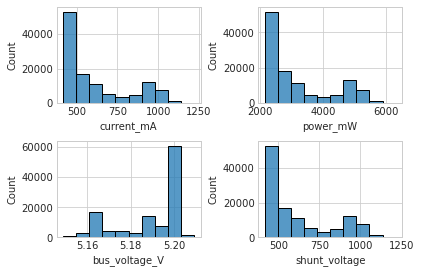

In [17]:
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.1, right=0.9, top=0.9, bottom=0.1)

sns.histplot(data=df, x='current_mA', bins=10)
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='power_mW', bins=10)
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='bus_voltage_V', bins=10)
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='shunt_voltage', bins=10)

<AxesSubplot:xlabel='Attack-Group', ylabel='count'>

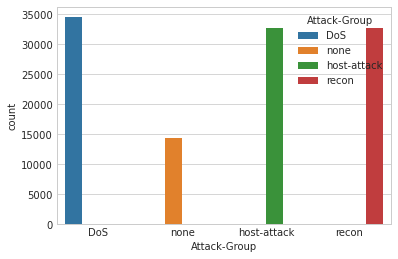

In [20]:
sns.countplot(data=df_no_duplicates, x='Attack-Group',hue='Attack-Group')

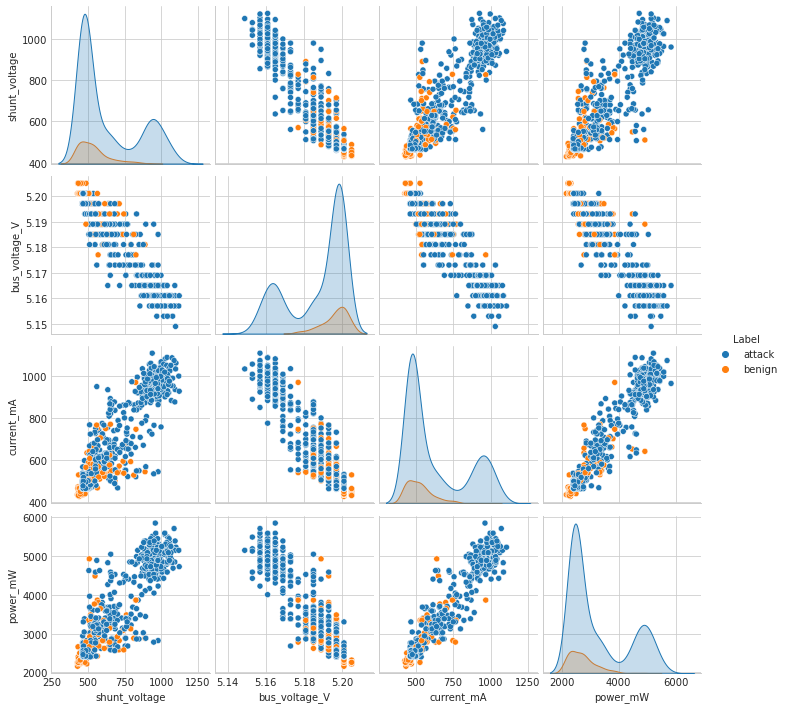

In [9]:
sns.pairplot(data=df.sample(n=1000), hue='Label')

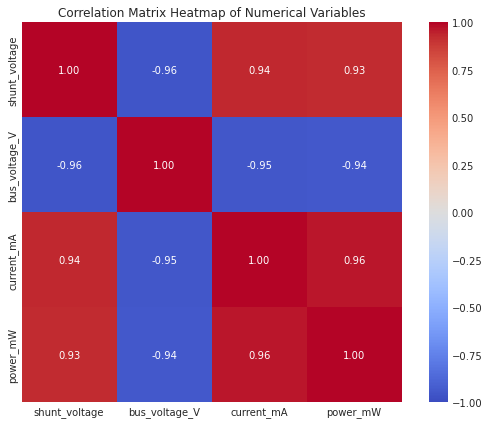

In [20]:
numeric_cols = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']
numeric_df = df[numeric_cols]

# Step 2: Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,          # Show the correlation values in the cells
            cmap='coolwarm',     # Color scheme (red for positive, blue for negative)
            vmin=-1, vmax=1,     # Range of correlation values (-1 to 1)
            center=0,            # Center the colormap at 0
            square=True,         # Make cells square
            fmt='.2f')           # Format the annotation to 2 decimal places

# Customize the plot
plt.title('Correlation Matrix Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']
numeric_df = df1[numeric_cols.d]

# Step 2: Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,          # Show the correlation values in the cells
            cmap='coolwarm',     # Color scheme (red for positive, blue for negative)
            vmin=-1, vmax=1,     # Range of correlation values (-1 to 1)
            center=0,            # Center the colormap at 0
            square=True,         # Make cells square
            fmt='.2f')           # Format the annotation to 2 decimal places

# Customize the plot
plt.title('Correlation Matrix Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [22]:
numeric_df = df1.select_dtypes(include=['int64', 'float64'])
numeric_df

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_sb_inodes_requeue,writeback_writeback_single_inode,writeback_writeback_single_inode_start,writeback_writeback_start,writeback_writeback_wait,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written
0,5.001477,0,0,0,0,0,693371795,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.001487,0,0,0,0,0,699964025,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.001641,0,0,0,0,0,549770341,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.003762,0,0,0,0,0,571970875,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.065740,0,0,0,0,0,553199786,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,0,0,0,0,0,5463807,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6162,288.714173,0,0,0,0,0,10977108,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6163,293.790086,0,0,0,0,0,3683292,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6164,298.861925,0,0,0,0,0,5165840,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Assuming your DataFrame is called 'df'
# 1. Prepare the data: Select numerical columns for t-SNE
# numerical_cols = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']
# df = df.sample(n=1000, random_state=42)
X = df[numerical_cols]

# 2. Standardize the features (important since the scales of voltage, current, etc., differ)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# 3. Apply t-SNE
tsne = TSNE(n_components=2,  # 2D plot
            perplexity=50,   # Adjust based on dataset size (5-50)
            random_state=42, # For reproducibility
            n_iter=300)      # Number of iterations


In [4]:
# Transform the data
X_tsne = tsne.fit_transform(X_scaled)

# 4. Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])

# Add the categorical column for coloring (e.g., 'Label' or 'Attack-Group')
# Let's use 'Label' for this example; you can swap it with 'Attack-Group' if preferred
tsne_df['Label'] = df['Label'].values

# 5. Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, 
                x='TSNE1', 
                y='TSNE2', 
                hue='Label',    # Color by 'Label'
                palette='deep', # Color palette
                alpha=0.6)      # Transparency

# Customize the plot
plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'tsne' is not defined

/tmp/job.2093840/ipykernel_867195/1976489204.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y:" (-> color='y'). The keyword argument will take precedence.
  plt.plot(range(1000), recon_data_smooth, 'y:',linewidth=2,color='orange', label='Recon')


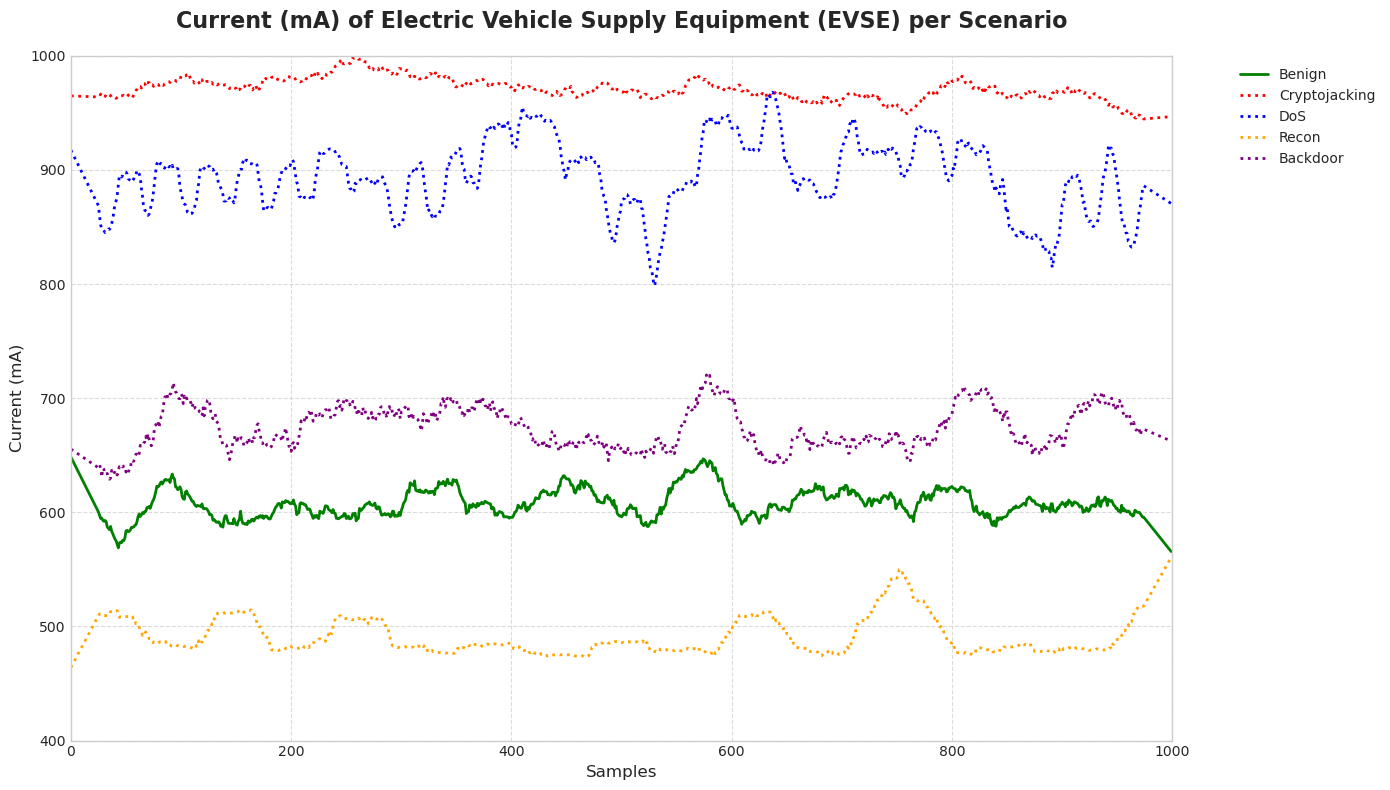

In [47]:
crypto_data = df[df['Attack'] == 'cryptojacking']['current_mA']
# host_attack_data = df[df['Attack-Group'] == 'host-attack']['current_mA'].values[:1000]
# print(host_attack_data)
benign_data = df[df['Attack-Group'] == 'none']['current_mA']
backdoor_data = df[df['Attack'] == 'Backdoor']['current_mA']
recon_data = df[df['Attack-Group'] == 'recon']['current_mA']
dos_data = df[df['Attack-Group'] == 'DoS']['current_mA']
crypto_data = df[df['Attack'] == 'cryptojacking']['current_mA']

crypto_data_1000 = df[df['Attack'] == 'cryptojacking']['current_mA']
# host_attack_data = df[df['Attack-Group'] == 'host-attack']['current_mA'].values[:1000]
# print(host_attack_data)
benign_data_1000 = df[df['Attack-Group'] == 'none']['current_mA'].values[:1000]
backdoor_data_1000 = df[df['Attack'] == 'Backdoor']['current_mA'].values[:1000]
recon_data_1000 = df[df['Attack-Group'] == 'recon']['current_mA'].values[:1000]
dos_data_1000 = df[df['Attack-Group'] == 'DoS']['current_mA'].values[:1000]
crypto_data_1000 = df[df['Attack'] == 'cryptojacking']['current_mA'].values[:1000]

window_length = 51  # Window size for smoothing (must be odd)
polyorder = 1       # Polynomial order for the filter
crypto_data_smooth = savgol_filter(crypto_data_1000, window_length, polyorder)
dos_data_smooth = savgol_filter(dos_data_1000, window_length, polyorder)
benign_data_smooth = savgol_filter(benign_data_1000, window_length, polyorder)
recon_data_smooth = savgol_filter(recon_data_1000, window_length, polyorder)
backdoor_data_smooth = savgol_filter(backdoor_data_1000, window_length, polyorder)
# window_size = 20  # Window size for the moving average
# crypto_data_smooth = np.convolve(crypto_data_1000, np.ones(window_size)/window_size, mode='valid')
# dos_data_smooth = np.convolve(dos_data_1000, np.ones(window_size)/window_size, mode='valid')
# benign_data_smooth = np.convolve(benign_data_1000, np.ones(window_size)/window_size, mode='valid')
# recon_data_smooth = np.convolve(recon_data_1000, np.ones(window_size)/window_size, mode='valid')

# Adjust the x-axis range to match the smoothed data length
# np.convolve with mode='valid' reduces the length by (window_size - 1)
# adjusted_samples = 1000 - (window_size - 1)

# Adjust the x-axis range to match the smoothed data length
# np.convolve with mode='valid' reduces the length by (window_size - 1)
# adjusted_samples = samples - (window_size - 1)

# # Create the plot
plt.figure(figsize=(14, 8))
plt.plot(range(1000), benign_data_smooth, 'g-',linewidth=2, label='Benign')
plt.plot(range(1000), crypto_data_smooth, 'r:',linewidth=2, label='Cryptojacking')
plt.plot(range(1000), dos_data_smooth, 'b:',linewidth=2, label='DoS')
plt.plot(range(1000), recon_data_smooth, 'y:',linewidth=2,color='orange', label='Recon')
plt.plot(range(1000), backdoor_data_smooth, ':',linewidth=2, color='purple',label='Backdoor')


# # plt.scatter(range(1000), host_attack_data, s=5, c='red', marker='o', alpha=0.5, label='Cryptojacking')
# # plt.scatter(range(1000), dos_data, s=5, c='blue', marker='o', alpha=0.5, label='DoS')
# # plt.scatter(range(1000), benign_data, s=5, c='green', marker='o', alpha=0.5, label='Benign')
# # plt.scatter(range(1000), recon_data, s=5, c='yellow', marker='o', alpha=0.5, label='Recon')
# # plt.scatter(range(samples), backdoor_data, s=5, c='magenta', marker='o', alpha=0.5, label='Backdoor')


# # # Customize the plot
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Current (mA)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlim(0,1000)

plt.ylim(400,1000)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Current (mA) of Electric Vehicle Supply Equipment (EVSE) per Scenario',fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

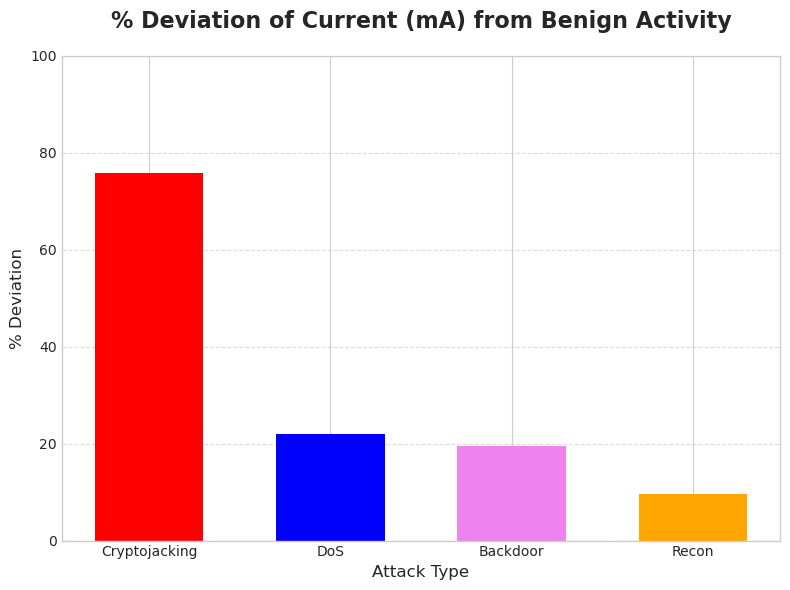

In [45]:
mean_crypto = crypto_data.mean()
mean_dos = dos_data.mean()
mean_backdoor = backdoor_data.mean()
mean_recon = recon_data.mean()
mean_benign = benign_data.mean()

# Calculate % deviation
deviation_crypto = abs((mean_crypto - mean_benign) / mean_benign) * 100
deviation_dos = abs((mean_dos - mean_benign) / mean_benign) * 100
deviation_backdoor = abs((mean_backdoor - mean_benign) / mean_benign) * 100
deviation_recon = abs((mean_recon - mean_benign) / mean_benign) * 100


attack_types = ['Cryptojacking', 'DoS', 'Backdoor', 'Recon']
means = [deviation_crypto,deviation_dos,deviation_backdoor,deviation_recon]
colors = ['red', 'blue', 'violet', 'orange']  # Match previous plot colors



plt.figure(figsize=(8, 6))
plt.bar(attack_types, means, color=colors, width=0.6)

# Customize the plot
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('% Deviation', fontsize=12)
plt.title('% Deviation of Current (mA) from Benign Activity', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,100)

plt.tight_layout()
plt.show()

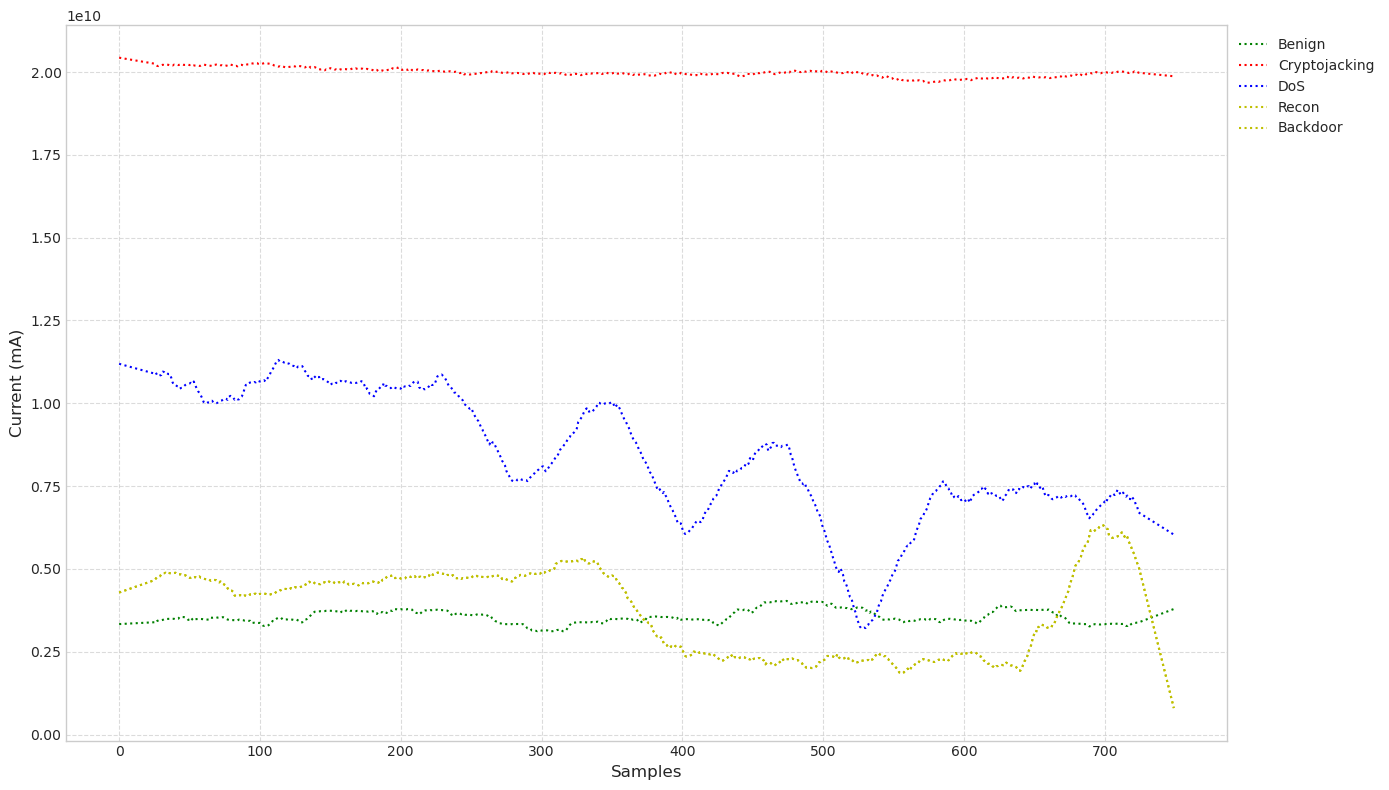

In [49]:

crypto_data = df1[df1['Scenario'] == 'Cryptojacking']['instructions']
benign_data = df1[df1['Scenario'] == 'Benign']['instructions']
backdoor_data = df2[df2['Attack'] == 'backdoor']['instructions']
recon_data = df1[df1['Scenario'] == 'Recon']['instructions']
dos_data = df1[df1['Scenario'] == 'DoS']['instructions']

crypto_data_1000 = df1[df1['Scenario'] == 'Cryptojacking']['instructions'].values[:750]
# host_attack_data = df[df['Attack-Group'] == 'host-attack']['current_mA'].values[:750]
# print(host_attack_data)
benign_data_1000 = df1[df1['Scenario'] == 'Benign']['instructions'].values[:750]
backdoor_data_1000 = df2[df2['Attack'] == 'backdoor']['instructions'].values[:750]
recon_data_1000 = df1[df1['Scenario'] == 'Recon']['instructions'].values[:750]
dos_data_1000 = df1[df1['Scenario'] == 'DoS']['instructions'].values[:750]


window_length = 51  # Window size for smoothing (must be odd)
polyorder = 1       # Polynomial order for the filter
crypto_data_smooth = savgol_filter(crypto_data_1000, window_length, polyorder)
dos_data_smooth = savgol_filter(dos_data_1000, window_length, polyorder)
benign_data_smooth = savgol_filter(benign_data_1000, window_length, polyorder)
recon_data_smooth = savgol_filter(recon_data_1000, window_length, polyorder)
backdoor_data_smooth = savgol_filter(recon_data_1000, window_length, polyorder)

# window_size = 20  # Window size for the moving average
# crypto_data_smooth = np.convolve(crypto_data_1000, np.ones(window_size)/window_size, mode='valid')
# dos_data_smooth = np.convolve(dos_data_1000, np.ones(window_size)/window_size, mode='valid')
# benign_data_smooth = np.convolve(benign_data_1000, np.ones(window_size)/window_size, mode='valid')
# recon_data_smooth = np.convolve(recon_data_1000, np.ones(window_size)/window_size, mode='valid')

# Adjust the x-axis range to match the smoothed data length
# np.convolve with mode='valid' reduces the length by (window_size - 1)
# adjusted_samples = 1000 - (window_size - 1)

# Adjust the x-axis range to match the smoothed data length
# np.convolve with mode='valid' reduces the length by (window_size - 1)
# adjusted_samples = samples - (window_size - 1)

# # Create the plot
plt.figure(figsize=(14, 8))
plt.plot(range(750), benign_data_smooth, 'g:', label='Benign')
plt.plot(range(750), crypto_data_smooth, 'r:', label='Cryptojacking')
plt.plot(range(750), dos_data_smooth, 'b:', label='DoS')
plt.plot(range(750), recon_data_smooth, 'y:', label='Recon')
plt.plot(range(750), backdoor_data_smooth, 'y:', label='Backdoor')

# # plt.scatter(range(1000), host_attack_data, s=5, c='red', marker='o', alpha=0.5, label='Cryptojacking')
# # plt.scatter(range(1000), dos_data, s=5, c='blue', marker='o', alpha=0.5, label='DoS')
# # plt.scatter(range(1000), benign_data, s=5, c='green', marker='o', alpha=0.5, label='Benign')
# # plt.scatter(range(1000), recon_data, s=5, c='yellow', marker='o', alpha=0.5, label='Recon')
# # plt.scatter(range(samples), backdoor_data, s=5, c='magenta', marker='o', alpha=0.5, label='Backdoor')


# # # Customize the plot
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Current (mA)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

20934341569.02677

Normalized % Deviations (Relative to Maximum):
Cryptojacking: 100.00%
DoS: 33.56%
Backdoor: 22.70%
Recon: 13.85%


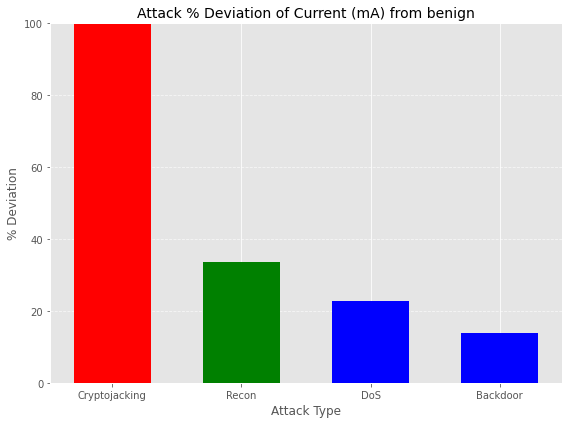

In [24]:
mean_crypto = crypto_data.mean()
print(mean_crypto)
mean_dos = dos_data.mean()
mean_backdoor = backdoor_data.mean()
mean_recon = recon_data.mean()
mean_benign = benign_data.mean()

# Calculate % deviation
deviation_crypto = abs((mean_crypto - mean_benign) / mean_benign) * 100
deviation_dos = abs((mean_dos - mean_benign) / mean_benign) * 100
deviation_backdoor = abs((mean_backdoor - mean_benign) / mean_benign) * 100
deviation_recon = abs((mean_recon - mean_benign) / mean_benign) * 100

# List of deviations
deviations = [deviation_crypto, deviation_dos, deviation_backdoor, deviation_recon]

# Find the maximum deviation
max_deviation = max(deviations)

# Normalize the deviations relative to the maximum
normalized_deviations = [(dev / max_deviation) * 100 for dev in deviations]

print("\nNormalized % Deviations (Relative to Maximum):")
print(f"Cryptojacking: {normalized_deviations[0]:.2f}%")
print(f"DoS: {normalized_deviations[1]:.2f}%")
print(f"Backdoor: {normalized_deviations[2]:.2f}%")
print(f"Recon: {normalized_deviations[3]:.2f}%")


attack_types = ['Cryptojacking', 'Recon', 'DoS', 'Backdoor']
means = [deviation_crypto,deviation_dos,deviation_backdoor,deviation_recon]
colors = ['red', 'green', 'blue', 'blue', 'magenta']  # Match previous plot colors



plt.figure(figsize=(8, 6))
plt.bar(attack_types, normalized_deviations, color=colors, width=0.6)

# Customize the plot
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('% Deviation', fontsize=12)
plt.title('Attack % Deviation of Current (mA) from benign', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,100)

plt.tight_layout()
plt.show()

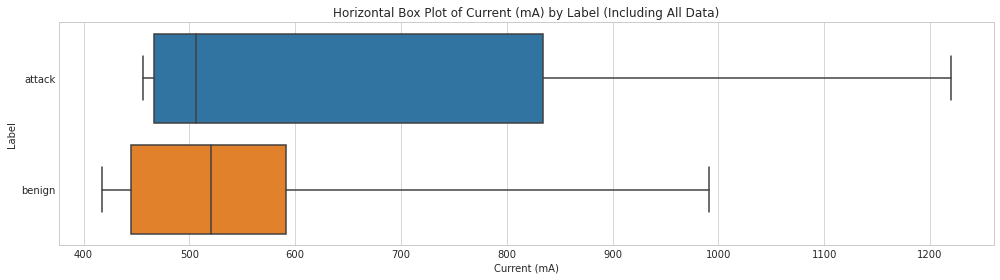

In [7]:
plt.figure(figsize=(14, 4))
sns.boxplot(x='current_mA', 
            y='Label', 
            data=df,
            whis=np.inf)  # Extend whiskers to the min and max values

# Customize the plot
plt.title('Horizontal Box Plot of Current (mA) by Label (Including All Data)')
plt.xlabel('Current (mA)')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

In [3]:
from scipy.stats import f_oneway, ttest_ind

In [16]:
groups = [group['current_mA'].values for name, group in df.groupby('Label')]
# groups

# Run the ANOVA test
# f_stat, p_value = f_oneway(*groups)

# # Print the results
# print(f"F-statistic: {f_stat:.4f}")
# print(f"P-value: {p_value:.20f}")

# # Interpret the result
# if p_value < 0.05:
#     print("Reject the null hypothesis: There is a significant difference in current_mA means across Label groups.")
# else:
#     print("Fail to reject the null hypothesis: No significant difference in current_mA means across Label groups.")

# attack = df[df['Label'] == 'attack']['current_mA']
# benign = df[df['Label'] == 'benign']['current_mA']
# t_stat, p_value = ttest_ind(attack, benign)
# cohen_d = (attack.mean() - benign.mean()) / np.sqrt((attack.std()**2 + benign.std()**2) / 2)
# print(f"Cohen's d: {cohen_d:.4f}")

attack = df[df['Label'] == 'attack']['current_mA']
benign = df[df['Label'] == 'benign']['current_mA']
t_stat, p_value = ttest_ind(attack, benign)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.2000f}")
print(f"Sample sizes: attack={len(attack)}, benign={len(benign)}")
print(f"Means: attack={attack.mean():.2f}, benign={benign.mean():.2f}")
print(f"Std devs: attack={attack.std():.2f}, benign={benign.std():.2f}")


T-statistic: 53.3761
P-value: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [5]:
columns_to_test = [
    'instructions', 'cpu-migrations', 'mem_access_rd', 'mem_access_wr',
    'cache-misses', 'L1-icache-loads', 'dTLB-store-misses'
]

# Run ANOVA for each column
for column in columns_to_test:
    # Group the data by 'Label' and extract the column values for each group
    groups = [group[column].values for name, group in df1.groupby('Label')]
    
    # Run the ANOVA test
    f_stat, p_value = f_oneway(*groups)
    
    # Print the results
    print(f"\nANOVA test for {column}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4e}")
    if p_value < 0.05:
        print("Significant difference between groups.")
    else:
        print("No significant difference between groups.")


ANOVA test for instructions:
F-statistic: 4485.9426
P-value: 0.0000e+00
Significant difference between groups.

ANOVA test for cpu-migrations:
F-statistic: 145.0435
P-value: 4.9242e-33
Significant difference between groups.

ANOVA test for mem_access_rd:
F-statistic: 5514.9487
P-value: 0.0000e+00
Significant difference between groups.

ANOVA test for mem_access_wr:
F-statistic: 2791.3720
P-value: 0.0000e+00
Significant difference between groups.

ANOVA test for cache-misses:
F-statistic: 3500.4311
P-value: 0.0000e+00
Significant difference between groups.

ANOVA test for L1-icache-loads:
F-statistic: 5699.5759
P-value: 0.0000e+00
Significant difference between groups.

ANOVA test for dTLB-store-misses:
F-statistic: 2645.6411
P-value: 0.0000e+00
Significant difference between groups.
